### Bab III : Menggambarkan Data

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
data = [int(np.random.normal(40, 6)) for i in range(100)]

In [245]:
data = pd.DataFrame(data, columns=['Data'])
Data = data.Data

#### Mean, Median, Modus

In [246]:
#Mean, median, modus
miu = np.sum(data.Data) / len(data.Data)
median = np.median(data)
modus = data.Data.value_counts().iloc[0]
print(miu,'\n',median, '\n', modus)

38.89 
 39.0 
 11


#### Dispersi


In [247]:
#Jangkauan = Range, rentang nilai
jangkauan = np.max(Data) - np.min(Data)
print(jangkauan)

#Mean Deviation = Deviasi Rata-Rata
MD = abs(Data - Data.mean()).sum() / len(Data)
print(MD.round(2))

#variance:ragam data
varians_pop = ((Data - Data.mean()) ** 2).sum() / len(Data)
varian_sample = ((Data - Data.mean()) ** 2).sum() / len(Data)-1
print(varians_pop.round(2))
print(varian_sample.round(2))

#Standard Deviaton : akar dari variansi. 
std_pop = np.sqrt(varians_pop)
std_sample = np.sqrt(varian_sample)
print(std_pop.round(2))
print(std_sample.round(2))





27
4.29
29.26
28.26
5.41
5.32


#### Ukuran posisi

{'whiskers': [<matplotlib.lines.Line2D at 0x17abc114a60>,
 'caps': [<matplotlib.lines.Line2D at 0x17abc114340>,
 'boxes': [<matplotlib.lines.Line2D at 0x17abbf97340>],
 'medians': [<matplotlib.lines.Line2D at 0x17ac5a44a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ac5a44880>],
 'means': []}

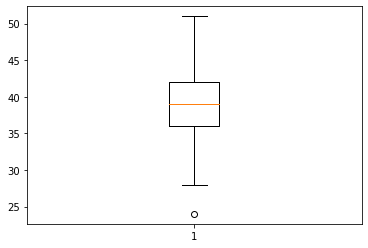

In [248]:
plt.boxplot(Data)

In [249]:
#Faktorial
class prob:
    
    def faktorialFor(n):
        hasil = 1
        for i in range(1, n + 1):
            hasil = hasil * i
        return hasil

    def faktorialRekursif(n):
        if n <= 1:
            return 1 
        else:
            hasil = n * prob.faktorialRekursif(n - 1)
        return hasil
    
    def permutasi(n, r):
        return prob.faktorialFor(n) / prob.faktorialFor(n - r)
    
    def kombinasi(n, r):
        return prob.faktorialRekursif(n) / (prob.faktorialRekursif(r) * prob.faktorialFor(n - r))
    

In [250]:
prob.permutasi(7, 3)

210.0

In [251]:
prob.kombinasi(7,3)

35.0

### Probabilitas Distribusi Diskrit

Menghitung mean:

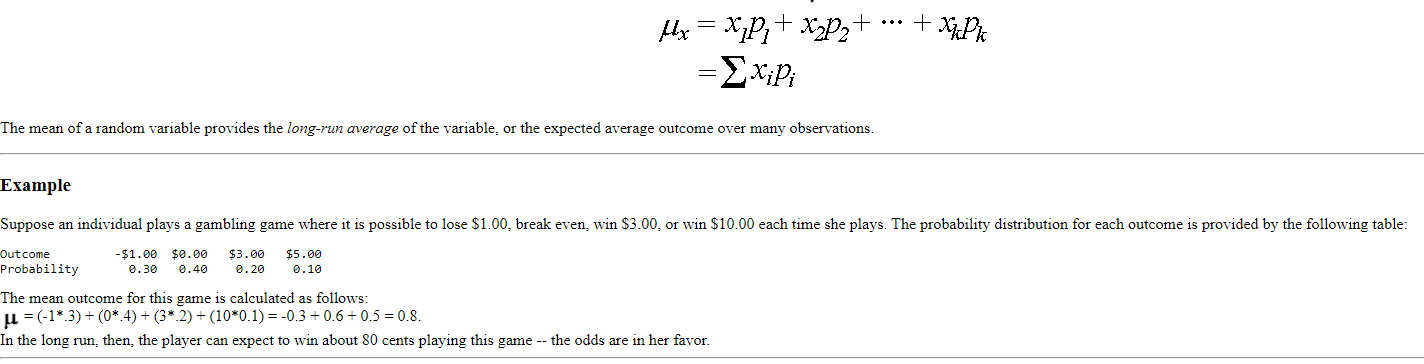

x = nilai yang muncul<br>px = probabilitas nilainya

Menghitung variansi dan standar deviasi Probabilitas Diskrit
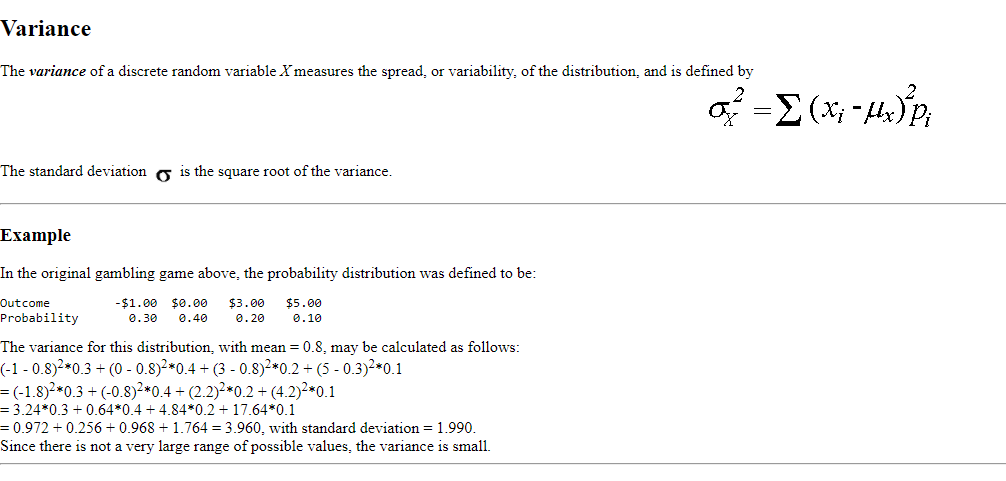

#### Probabilitas Binomial

Probabilitas binomial: hanya ada dua kemungkinan, seperti berhasil atau tidak, kepala atau ekor, ganteng atau tidak.
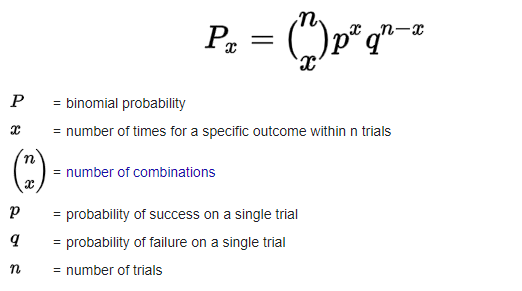

Itu kombinasi ya. Marikita bikin fungsi baru: binomHitung

In [252]:
#fungsi menghitung probabilitas binomial
def binomHitung(n, p):
    '''
    Menghitung nilai probabilitas binomial dari setiap nilai sukses yang keluar
    n = jumlah percobaan
    p = nilai probabilitas keberhasilan, harus antara 0 dan 1
    '''
    binom_dict = dict()
    binom_value = list()
    for i in range(n + 1):
        value = prob.kombinasi(n, i) * (p ** i) * ((1 - p) ** (n - i))
        value = np.round(value, 4)
        binom_value.append(value)
        binom_dict[i] = binom_value[i]
        
    return binom_dict

In [253]:
binom_test = binomHitung(5, 0.4)
binom_cumsum = np.cumsum(list(binom_test.values()))
print(binom_test)
print(binom_cumsum)

{0: 0.0778, 1: 0.2592, 2: 0.3456, 3: 0.2304, 4: 0.0768, 5: 0.0102}
[0.0778 0.337  0.6826 0.913  0.9898 1.    ]


Menghitung mean dan variance


In [254]:
def binomMeanVar(n, p):
    '''
    Menghitung mean dan variance dari Distribusi Binomial
    n = jumlah percobaan
    p = nilai probabilitas keberhasilan, harus di antara 0 dan 1
    '''
    mu = n * p
    variance = n * p * (1 - p)
    return mu, variance

In [255]:
binomMeanVar(5, 0.4)

(2.0, 1.2)

Plotting PMF dan CDF

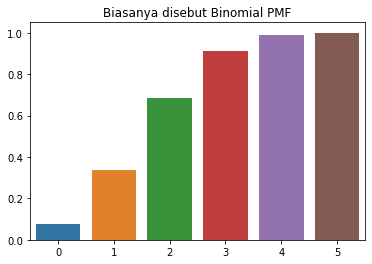

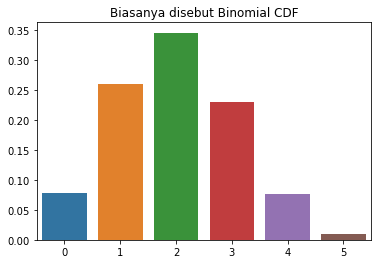

In [256]:
import seaborn as sns

sns.barplot(x = np.arange(0, 6), y = binom_cumsum)
plt.title('Biasanya disebut Binomial PMF')
plt.show()

sns.barplot(x = list(binom_test.keys()), y = list(binom_test.values()))
plt.title('Biasanya disebut Binomial CDF')
plt.show()


#### Distribusi Probabilitas Hipergeometris

Hipergeometris memiliki ciri-ciri:
1. Hasil setiap percobaan dari eksperimen digolongkan menjadi satu atau dua kategori yang saling lepas-berhasil/gagal
2. Variabel acak: jumlah keberhasilan dalam sejumlah percobaan.
3. Percobaan tersebut tidak saling bebas.
4. Diasumsikan dengan mengambil contoh dari suatu populasi terbatas tanpa pengembalian dan n/N > 0.05. Jadi, probabilitas keberhasilan berubah setiap percobaan

Menghitung probabilitas geometri

In [257]:
def geometriHitung(N, S, n):
    '''
    Menghitung probabilitas geometri
    N = jumlah populasi
    S = jumlah keberhasilan populasi
    n = jumlah sampel/percobaan
    x = jumlah keberhasilan pada sampel, contoh: 0, 1 dst
    '''
    geometri_dict = dict()
    geometri_value = list()
    if N >= S:
        for i in range(0, n + 1):
            value = (prob.kombinasi(S, i) * prob.kombinasi(N - S, n - i)) / prob.kombinasi(N, n)
            value = np.round(value, 4)
            geometri_value.append(value)
            geometri_dict[i] = geometri_value[i]
        return geometri_dict
    else:
        print('Jumlah keberhasilan populasi harus kurang atau sama dengan jumlah populasi')
          

In [258]:
geometri_test = geometriHitung(50, 40, 5)
geometri_cumsum = np.cumsum(list(geometri_test.values()))
print(geometri_test)
print(geometri_cumsum.round(4))

{0: 0.0001, 1: 0.004, 2: 0.0442, 3: 0.2098, 4: 0.4313, 5: 0.3106}
[1.000e-04 4.100e-03 4.830e-02 2.581e-01 6.894e-01 1.000e+00]


#Plotting PMF dan CDF

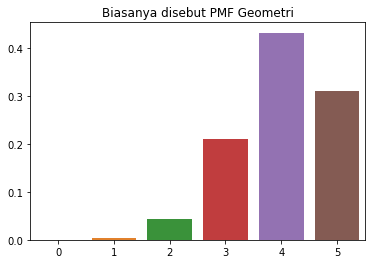

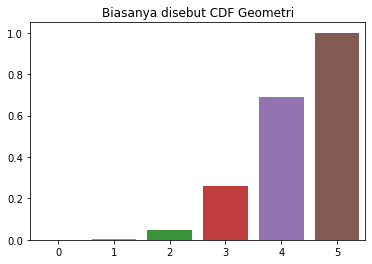

In [259]:
#PMF
sns.barplot(x = list(geometri_test.keys()), y = list(geometri_test.values()))
plt.title('Biasanya disebut PMF Geometri')
plt.show()

sns.barplot(x = list(geometri_test.keys()), y = geometri_cumsum)
plt.title('Biasanya disebut CDF Geometri')
plt.show()

#### Probabilitas Poisson

Poisson distribution memiliki ciri-ciri:
1. Variabel acaknya berupa berapa kali seuatu kmejadian terjadi selama rentang yang ditentukan
2. Probabilitas kejadian tersebut sebanding dengan ukuran rentang
3. Tidak ada pengulangan rentang dan rentang-rentangnya saling bebas

Menghitung probabilitas poisson:

In [260]:
def poissonHitung(mu, x):
    '''
    Menghitung probabilitas poisson
    mu = rata-rata kejadian berhasil pada suatu rentang
    x = jumlah kejadian berhasil
    '''
    
    poisson_dict = dict()
    poisson_value = list()
    for i in range(0, x + 1):
        value = ((mu ** i) * np.exp(-mu)) / prob.faktorialFor(i)
        value = np.round(value, 4)
        poisson_value.append(value)
        poisson_dict[i] = poisson_value[i]
    return poisson_dict

In [261]:
poisson_test = poissonHitung(3, 10)
poisson_cumsum = np.cumsum(list(poisson_test.values()))
print(poisson_test)
print(poisson_cumsum)

{0: 0.0498, 1: 0.1494, 2: 0.224, 3: 0.224, 4: 0.168, 5: 0.1008, 6: 0.0504, 7: 0.0216, 8: 0.0081, 9: 0.0027, 10: 0.0008}
[0.0498 0.1992 0.4232 0.6472 0.8152 0.916  0.9664 0.988  0.9961 0.9988
 0.9996]


#Plotting PMF dan CDF

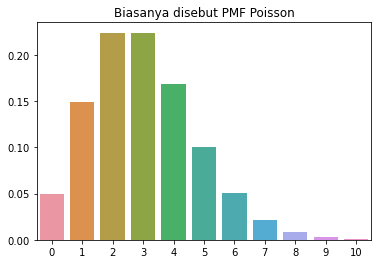

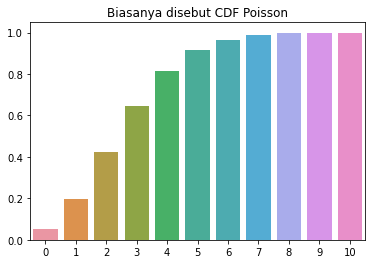

In [262]:
#PMF
sns.barplot(x = list(poisson_test.keys()), y = list(poisson_test.values()))
plt.title('Biasanya disebut PMF Poisson')
plt.show()

sns.barplot(x = list(poisson_test.keys()), y = poisson_cumsum)
plt.title('Biasanya disebut CDF Poisson')
plt.show()

### Probabilitas Kontinu

#### Probabilitas Kontinu Normal

Probabilitas Kontinu Normal memiliki ciri-ciri sebagai berikut:
1. Distribusi probabilitas normal berbentuk lonceng/gaussian kalau kata rangorang, dengan rata-rata, median, dan modus terletak di tengah distribusi. Luas total kurva sebesar 1.00
2. Probabilitas ini simetris mengenai rata-ratanya, dan menurun halus pada arah apapun dari nilai tengahnya yang disebut dengan asymptotic:kurva semakin mendekati sumbu x tetapi tidak sampai menyinggungnya, jadi ekornya memanjang dengan tak terbatas pada kedua arahnya.
3. Letak distribusi normal ditentukan oleh rata-rata mu. Dispersi dari distribusi ditentukan oleh standar deviasi, sigma.

Yang membedakan antara kontinu dan diskret adalah diskret akan menghasilkan probabilitas pada nilai tertentu, karena nilai yang bersifat data kategori, sehingga setiap nilai akan memiliki probabilitasnya masing-masing. Sedangkan pada kontinu, nilai probabilitas dihidung berdasarkan rentang dari kedua nilai, baik berdasarkan miu ataupun dari nilai-nilai tertentu.

Rumus probabilitas normal dalam dituliskan dalam fungsi python:


In [263]:
def normalProbability(bins, mu, sigma):
    '''
    Menghitung probabilitas normal kontinu
    X = dalam histogram disebut bins, rentang antar nilai
    mu = nilai rata-rata variabel acak/data
    sigma = nilai standar deviasi variabel acak/data    
    '''
    value = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2 / (2 * sigma ** 2)))
    return value

Membuat variabel acak probabilitas normal

In [264]:
np.random.seed(42)

#menentukan mean dan standar deviasi
mu = 2000
sigma = 400
gaji_bulanan = list(int(np.random.normal(mu, sigma)) for i in range(2000))

#Membuat dataframe dari list gaji_bulanan
df = pd.DataFrame(gaji_bulanan, columns=['gaji'])
print(df.head())

   gaji
0  2198
1  1944
2  2259
3  2609
4  1906


Melakukan plotting terhadap data

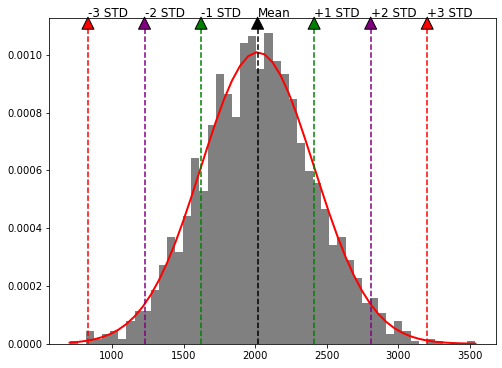

In [265]:
#menentukan mu dan sigma
mu, sigma = df.gaji.mean(), df.gaji.std()
#menentukan ukuran figure
plt.figure(figsize = (8, 6))

#membuat plot histogram distribusi dari variabel acak
bins_value, bins, _ = plt.hist(df.gaji, bins = 50, density = True, color = 'gray')

#membuat plot garis/lineplot dari probabilitasnya
value_list = plt.plot(bins, 
                      normalProbability(bins, mu = mu, 
                                        sigma = sigma),
                      linewidth = 2, color = 'r')

#Menentukan garis untuk tiap batas distribusi
plt.axvline(x = mu, ls = '--', c = 'black')
plt.axvline(x = mu - sigma, ls = '--', c = 'green')
plt.axvline(x = mu + sigma, ls = '--', c = 'green')
plt.axvline(x = mu - 2 * sigma, ls = '--', c = 'purple')
plt.axvline(x = mu + 2 * sigma, ls = '--', c = 'purple')
plt.axvline(x = mu - 3 * sigma, ls = '--', c = 'red')
plt.axvline(x = mu + 3 * sigma, ls = '--', c = 'red')

#Menentukan anotasi untuk tiap garis
plt.annotate('Mean', (mu, 0.00113),
             xytext = (mu, 0.00113),
             arrowprops = dict(facecolor = 'black'),
             fontsize = 12)
plt.annotate('-1 STD', (mu - sigma, 0.00113),
             xytext = (mu - sigma, 0.00113),
             arrowprops = dict(facecolor = 'green'),
             fontsize = 12)
plt.annotate('+1 STD', (mu + sigma, 0.00113),
             xytext = (mu + sigma, 0.00113),
             arrowprops = dict(facecolor = 'green'),
             fontsize = 12)
plt.annotate('-2 STD', (mu - 2 * sigma, 0.00113),
             xytext = (mu - 2 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'purple'),
             fontsize = 12)
plt.annotate('+2 STD', (mu + 2 * sigma, 0.00113),
             xytext = (mu + 2 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'purple'),
             fontsize = 12)
plt.annotate('-3 STD', (mu - 3 * sigma, 0.00113),
             xytext = (mu - 3 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'red'),
             fontsize = 12)
plt.annotate('+3 STD', (mu + 3 * sigma, 0.00113),
             xytext = (mu + 3 * sigma, 0.00113),
             arrowprops = dict(facecolor = 'red'),
             fontsize = 12)
plt.show()

#### Menghitung daerah dalam kurva normal menggunakan z-score

Z-score adalah ukuran simpangan data dari nilai rata-ratanya yang diukur dalam satuan standar deviasi. Biasanya disebut dengan Standar score. Jika nilai berada di atas nilai rata-rata, maka akan bernilai positif. Sebaliknya jika berada di bawah nilai rata-ratanya, makan akan bernilai negatif.

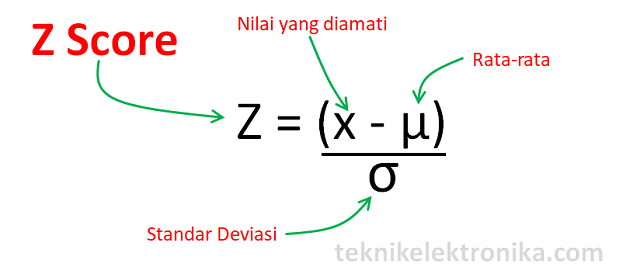



In [266]:
class areaKurva:
    '''
    Class berisi penghitungan z_score dan probabilitas area
    '''
    def zScore(x, mu = 0, sigma = 0, data = None):
        '''
        Menghitung z-score dari suatu nilai
        x = nilai yang diamati
        mu = mean
        sigma = standard deviasi
        data = jika mu dan sigma bernilai default, maka data wajib diisi dengan data
        '''
        if (mu > 0 and sigma > 0) and data is None:
            z_score = (x - mu) / sigma
            return z_score
        elif (mu == 0 and sigma == 0) and data is not None:
            z_score = (x - data.mean()) / data.std()
            return z_score
        else:
            raise Exception('Data input tidak benar!')
        
    def probsArea(x1, x2, mu = 0, sigma = 0, data = None):
        '''
        Menghitung probabilitas dalam dua titik
        x1: nilai x1
        x2: nilai x2
    
        Memilih data input berupa mu-sigma, atau data
        mu: nilai tengah
        sigma: standard deviasi
        data: jika mu dan sigma tidak diisi, maka data harus dicantumkan
        '''
        #Scipy
        from scipy import stats
    
        #Melakukan pengondisian input, apakah menggunakan mu-sigma, atau data
        if (mu > 0 and sigma > 0) and data is None:
            zscore_x1 = areaKurva.zScore(x1, mu = mu, sigma = sigma)
            zscore_x2 = areaKurva.zScore(x2, mu = mu, sigma = sigma)
            x1_percentile = stats.norm.cdf(zscore_x1)
            x2_percentile = stats.norm.cdf(zscore_x2)
            prob = abs(x2_percentile - x1_percentile)
            return prob
        elif (mu == 0 and sigma == 0) and data is not None:
            zscore_x1 = areaKurva.zScore(x1, data = data)
            zscore_x2 = areaKurva.zScore(x2, data = data)
            x1_percentile = stats.norm.cdf(zscore_x1)
            x2_percentile = stats.norm.cdf(zscore_x2)
            prob = abs(x2_percentile - x1_percentile)
            return prob
        else:
            raise Exception('Data input tidak benar!')

In [267]:
gaji_prob = areaKurva.probsArea(x1 = 1600, x2 = 1800, data = df.gaji)
gaji_prob

0.1456165956263885

#### Pendekatan Distribusi Normal terhadap Probabilitas Binomial

Pendekatan distribusi normal dapat digunakan untuk mengganti distribusi binomial karena apabila jumlah percobaan atau n besar, maka distribusi binomial akan semakin mendekati distribusi normal. Pendekatan ini dapat dilakukan ketika n * p, di mana n = jumlah percobaan, dan p = probablitasnya, serta n(1 - p) keduanya sedikitnya 5. Sebelum itu, kriteria distribusi binomial harus terpenuhi, yakni:

1. Hanya ada dua hasil yang saling lepas pada suatu eksperimen: 'berhasil' dan 'gagal'.
2. Distribusi diperoleh dari menghitung angka keberhasilan dalam sejumlah percobaan.
3. Probabilitas suatu keberhasilan, p, tetap sama dari percobaan ke percobaan.
4. Setiap percobaan saling bebas.

Untuk menunjukkan penerapan distribusi normal terhadap distribusi binomial, maka perlu dilakukan <b>faktor koreksi kontinuitas, yakni dengan menambah atau mengurangi nilai X (hasil spesifik yang ditentukan dalam percobaan sejumlah n) sebesar 0.5, tergantung dari pertanyaan/keinginan yang dicari, ketika distribusi probabilitas diskret melalui distribusi probabilitas kontinu</b>.

Untuk menerapkan faktor koreksi ini, terdapat 4 kasus yang biasa muncul:
1. Untuk probabilitas <i>sedikitnya</i> X terjadi, gunakan area di atas (X - 0.5)
2. Untuk probabilitas bahwa <i>lebih dari</i> X terjadi, gunakan area di atas (X + 0.5)
3. Untuk probabilitas bahwa <i> X atau kurang dari X</i> terjadi, gunakan area di bawah (X + 0.5)
4. Untuk probabilitas bahwa <i> kurang dari X</i> terjadi, gunaan area di bawah (X - 0.5)

 

Kita akan mencoba mengerjakan suatu soal:

<b>Diketahui</b>: n = 80, X = 60, p = 0.7<br>
<b>Ditanyakan</b>: Bagaimana probabilitasnya, jika X dari n akan kembali?<br>
<b>Jawab</b>:

Jumlah percobaan (n) = 80<br>
Nilai probabilitas (p) = 0.7<br>
Hasil spesifik yang ditentukan (X) = 60<br>

<u>Membuat plot Binomial pmf</u>

In [268]:
#Preprocessing
#Melakukan penghitungan dengan X mulai dari 0 hingga n
binom_n = binomHitung(n = 80, p = 0.7)

#Eliminasi probabilitas yang yang hasil pembulatannya bernilai 0
for k, v in list(binom_n.items()):
    if v == 0:
        del binom_n[k]

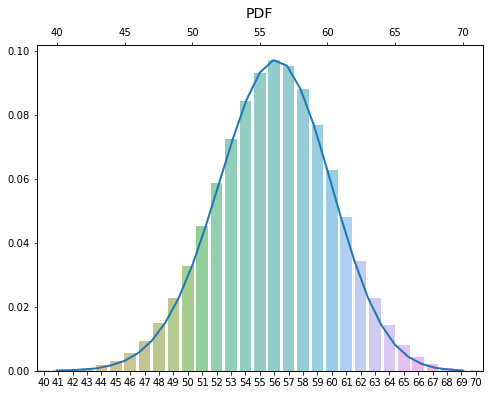

In [269]:
#Plotting PMF
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = list(binom_n.keys()), 
            y = list(binom_n.values()), ax = ax, alpha = 0.6)
ax1 = ax.twiny()
sns.lineplot(x = list(binom_n.keys()), linewidth = 2,
             y = list(binom_n.values()), ax = ax1)
plt.title('PDF', size = 14, pad = 10)
plt.show()


<u>Menghitung mean dan standar deviasi, serta z-score</u>

Untuk z-score, kita akan menggunakan koreksi X-0.5, untuk menghitung probabilitas sedikitnya nilai X terjadi.

In [270]:
#Menghitung mean dan std
mu, var = binomMeanVar(n=80, p=0.7)
std = np.sqrt(var).round(4)
print(mu)
print(std)

56.0
4.0988


In [271]:
#Menghitung z-score
z_score = areaKurva.zScore(x = 60-0.5, 
                           mu = mu,
                           sigma = std).round(4)
print('Nilai z_score =', z_score)

#Menghitung nilai probabilitas dari z_score
probs = stats.norm.cdf(z_score).round(4)
print('Probabilitas dari nilai z_score =', 1 - probs)

Nilai z_score = 0.8539
Probabilitas dari nilai z_score = 0.1966


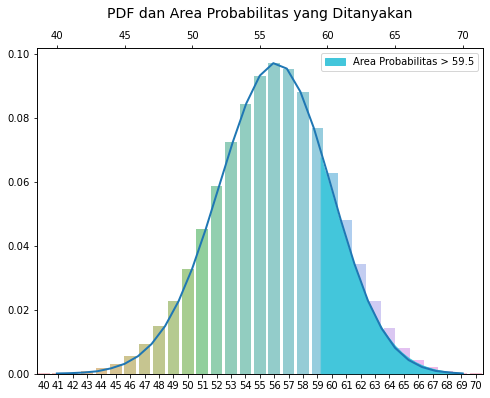

In [272]:
#Re-plotting PMF
x_area = np.arange(59.5, 70.5, 0.5)
y_area = normalProbability(x_area, mu, std)
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = list(binom_n.keys()), 
            y = list(binom_n.values()), ax = ax, alpha = 0.6)
ax1 = ax.twiny()
sns.lineplot(x = list(binom_n.keys()), linewidth = 2,
             y = list(binom_n.values()), ax = ax1)
ax1.fill_between(x_area, y_area, color = '#43C6DB', label = 'Area Probabilitas > 59.5')
plt.legend()
plt.title('PDF dan Area Probabilitas yang Ditanyakan', size = 14, pad = 13)
plt.show()


#### Distribusi Eksponensial

Distribusi ini menggambarkan waktu antar tiap kejadian dalam urutannya, dengan tindakan yang terjadi saling bebas pada tingkat konstan per satuan lamanya waktu. Selalu bernilai positif. Contoh Eksponensial adalah sebagai berikut:
1. Lamanya waktu yang dibutuhkan untuk melayani pelanggan.
2. Lama menyalanya komponen listrik.
3. Waktu hingga panggilan telepon berikutnya diangkat oleh pusat layanan pelanggan.


Distribusi ini memiliki hubungan dengan distribusi diskret Poisson. Keduanya sama-sama memiliki distribusi asimetris positif. Selain itu, dalam Poisson, dibutuhkan parameter mu(mean/rata-rata) untuk menghitung probabilitasnya. Sedangkan, parameter Eksponensial adalah theta(θ) atau lamda(λ) yang merupakan 1/mu. Rumus yang digunakan:
1. Probabilitas X atau P(X)<br>
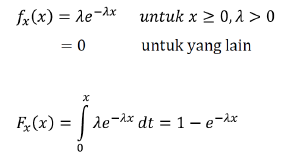

2. Mencari Probabilitas Distribusi Eksponensial Berdasarkan Suatu Nilai<br>
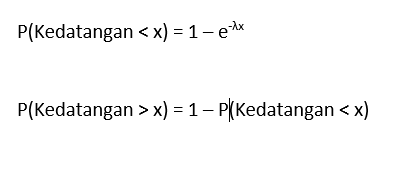
3. Mean dan Standar Deviasi (memiliki rumus yang sama) = <b>1 / λ</b>

Membuat fungsi untuk menghitung menampilkan plot distribusi dan area berdasarkan suatu nilai

In [273]:
class exponent:
    '''
    Class dari fungsi distribusi dan area kumulatif suatu nilai
    '''
    def __init__(self, lamda, X):
        '''
        Inisiasi parameter yang dibutuhkan dalam distribusi eksponensial
        lamda = tingkatan/rate parameter
        X = nilai yang diinginkan
        '''
        self.lamda = lamda
        self.X = X
        
    def probability(self):
        '''
        Menghitung probabilitas X
        '''
        probs = self.lamda * np.exp(-self.lamda * self.X)
        return probs
    
    def cumulative(self):
        '''
        Menghitung area kumulatif berdasarkan nilai X
        '''
        cums = 1 - np.exp(-self.lamda * self.X)
        return cums
        

In [274]:
X = np.arange(0, 100, 1)
exp_tes = exponent(1/6, X)
exp_prob = exp_tes.probability()
exp_cum = exp_tes.cumulative()

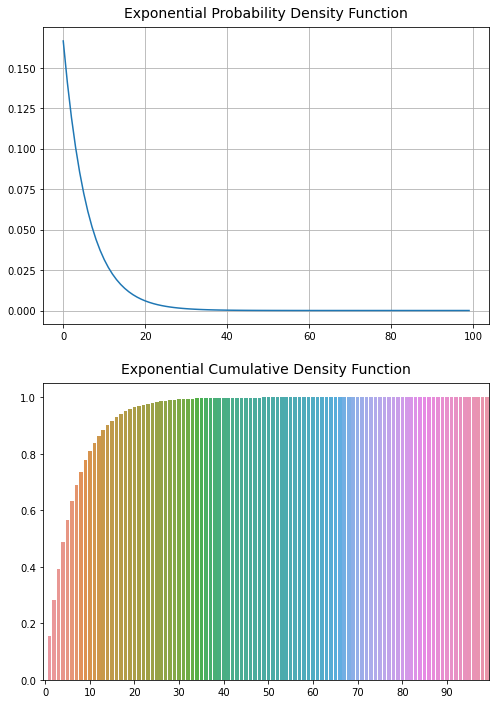

In [275]:
#Plot Probabilitas dan CDF
fig, ax = plt.subplots(2, 1, figsize = (8, 12))

sns.lineplot(x=X, y=exp_prob, ax=ax[0])
ax[0].grid('True')
ax[0].set_title('Exponential Probability Density Function', size = 14, pad = 10)
sns.barplot(x = X, y = exp_cum, ax = ax[1])
ax[1].set_xticks(np.arange(0, 100, 10))
ax[1].set_title('Exponential Cumulative Density Function', size = 14, pad = 10)
plt.show()

### Central Limit Theorem
Central limit theorem atau dalam bahasa Indonesia berarti teorema nilai tengah, adalah sebuah teorema yang menyatakan bahwa pada sampel acak besar, bentuk distribusi sampling rata-rata sampel mendekati distribusi probabilitas normal. Biasanya mulai dari jumlah pengamatan n dalam sampel sebanyak 10-30 atau lebih akan terlihat normal. Semakin banyak jumlah pengamatan, akan semakin menghiraukan distribusi populasinya.

#### Belajar melalui contoh 
Kita akan memulai belajar tentang CLT melalui random variable dari Python. Tahapan pertama adalah menentukan data.

In [276]:
#Membuat data untuk CLT
clt_data = list(np.random.exponential(scale = 6, size = 100))
clt_data = pd.DataFrame(clt_data, columns=['data'])


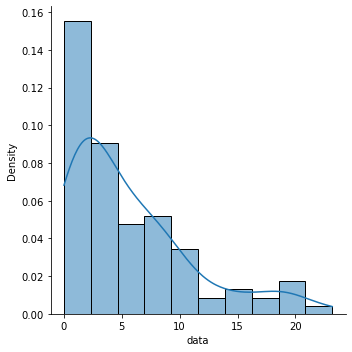

In [277]:
sns.displot(x = clt_data['data'], kde = True, stat = 'density')
plt.show()

In [278]:
#Menggunakan fungsi sendiri
exponent_data = exponent(lamda=1/6, X=np.arange(0, 100, 1)).probability()

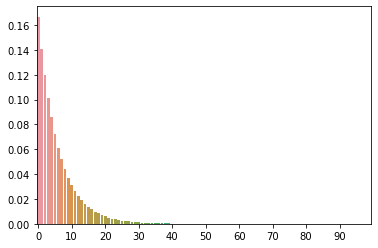

In [279]:
sns.barplot(x = np.arange(0, len(exponent_data), 1), y = exponent_data)
plt.xticks(np.arange(0, 100, 10))
plt.show()

#### Menentukan sampel.
Kita akan melakukan sampling secara acak dengan bantuan library Numpy karena data yang digunakan bersifat 1-dimensi. Jika data lebih dari 1-D, bisa menggunakan Pandas. Cek dokumentasi untuk lebih lanjut.

In [280]:
#Menghitung kombinasi 30 sampel
n_comb = prob.kombinasi(len(clt_data), 30)
print('Jumlah kombinasi pengamatan suatu sampel dengan N = 100 dan n = 30 sebesar', n_comb, '\n')

#Menghitung rata-rata populasi dan standar deviasinya
print(clt_data.describe().data[[1, 2]])

Jumlah kombinasi pengamatan suatu sampel dengan N = 100 dan n = 30 sebesar 2.9372339821610947e+25 

mean    5.60712
std     5.36208
Name: data, dtype: float64


In [281]:
#Membuat fungsi sampling
def sampling(data, nobs, size, orient = 0):
    '''
    Melakukan sampling terhadap suatu data series data 
    dengan jumlah pengamatan n, dan jumlah sampel s
    Required: Numpy Library
    data = data series
    nobs = jumlah pengamatan
    size = jumlah sampel
    orient = orientasi dataframe dengan nilai default = 0 yakni column, 1 untuk baris
    '''
    data_dict = dict()    
    if nobs < len(data):
        for i in range(1, int(size) + 1):
            dict_value = np.random.choice(data, nobs, replace = False)           
            data_dict["sample_" + str(i)] = dict_value
        
        if orient == 0 or orient != 1:
            df_sample = pd.DataFrame.from_dict(data= data_dict, orient = 'columns')
        else:
            df_sample = pd.DataFrame.from_dict(data = data_dict, orient = 'index')
        return df_sample
    else:
        raise Exception('Jumlah nobs tidak boleh lebih dari atau sama dengan populasi data')

In [282]:
df_sample = sampling(clt_data.data, 40, 100)
df_sample.describe()

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,6.165399,5.195877,5.195166,5.601152,4.817349,5.132198,7.422866,6.415798,5.183119,5.477153,...,6.051950,4.862863,5.708508,5.272724,5.180538,5.274229,6.026847,5.335336,6.093992,5.554322
std,5.768673,5.047586,5.289316,5.268726,4.210159,4.231611,6.319676,5.888750,4.695646,4.938324,...,5.841127,4.607153,5.555137,5.304850,4.342281,5.752068,5.844606,4.918980,5.720133,5.594818
min,0.022963,0.022963,0.022963,0.022963,0.026237,0.022963,0.000808,0.022963,0.000808,0.026237,...,0.309187,0.296314,0.026237,0.022963,0.026237,0.000808,0.309187,0.287910,0.000808,0.000808
25%,1.881250,1.368502,1.053253,2.000048,2.097096,2.274757,2.216628,1.959516,1.999911,1.930245,...,1.990336,1.834096,2.225756,0.823009,1.929356,0.843262,1.850079,1.989858,2.221227,0.690650
50%,4.230160,3.832520,3.617779,4.165039,4.141529,4.245523,6.393038,4.102233,4.165039,3.983847,...,4.181192,3.211124,4.141529,4.124403,4.157682,2.749791,4.181192,3.115099,4.157682,3.651411
75%,7.658026,7.658026,7.365578,8.453796,6.345806,7.297401,10.075114,9.224614,7.052631,8.774890,...,8.654512,6.906831,7.297964,7.348759,7.398101,7.901630,7.689286,7.658026,7.365578,8.547370
max,23.174004,18.851463,19.958502,23.174004,18.621937,20.296758,23.174004,19.958502,18.621937,20.296758,...,23.174004,19.958502,23.174004,23.174004,17.703180,23.174004,23.174004,18.851463,23.174004,19.958502


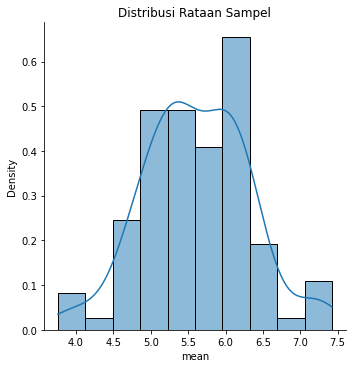

In [283]:
sns.displot(df_sample.describe().iloc[1], stat = 'density', kde = True)
plt.title('Distribusi Rataan Sampel')
plt.show()

In [284]:
#Menampilkan Mu dari rataan sampel(mean dalam mean sampel) & standar deviasinya
mu_sample_mean = np.mean(df_sample.describe().iloc[1])
standard_error = clt_data.data.std() / np.sqrt(len(df_sample))

print('Rata-rata dari rataan sampel adalah sebesar', np.round(mu_sample_mean, 5))
print('Nilai kesalahan baku dari rata-rata sebesar', np.round(standard_error, 5))
print('Nilai kesalahan sampling sebesar', np.round((mu_sample_mean - clt_data.data.mean()), 5))

Rata-rata dari rataan sampel adalah sebesar 5.61327
Nilai kesalahan baku dari rata-rata sebesar 0.84782
Nilai kesalahan sampling sebesar 0.00615


Berdasarkan hasil di atas, kita mendapatkan gambaran bahwa:
1. Distribusi populasi bersifat eksponensial, sedangkan pada distribusi rataan sampel bersifat normal. Hal ini selaras dengan Central Limit Theorem bahwa distribusi rataan sampel akan mengikuti distribusi probabilitas normal yang dipengaruhi oleh jumlah pengamatannya.
2. Kesalahan/error sampling merupakan selisih statistik sampel dengan parameter populasi yang sesuai. Dalam contoh di atas, kesalahan sampling berupa selisih rata-rata rataan sampel dengan rata-rata populasi.
3. Standard Error atau kesalahan baku dari rata-rata digunakan untuk mengukur variasi pada distribusi sampling rata-rata. Nilai antar sampel selalu sama, karena yang menjadi parameternya adalah standard deviasi populasi dan akar kuadrat dari jumlah pengamatan dari sebuah sampel.
4. Sebagai tambahan, apabila populasi mengikuti distribusi normal, distribusi sampling rata-rata juga akan mengikuti distribusi normal pada sampel berukuran berapapun. Asumsikan standar deviasi populasi diketahui, untuk menentukan probabilitas bahwa rata-rata sampel berada pada daerah tertentu, dapat menggunakan rumus <b> z = (X – μ) / (σ / √n) </b> dengan X adalah X-bar atau rata-rata sampel




### Estimasi dan Interval Kepercayaan
Estimasi, khususnya estimasi titik adalah nilai tunggal yang dihitung dari sampel dan digunakan untuk memperkirakan parameter populasi. Contohnya berupa rata-rata sampel sebesar 1050, maka angka tersebut merupakan estimasi terbaik untuk rata-rata populasi.<br>
Interval kepercayaan merupakan jangkauan titik di mana parameter populasi diperkirakan untuk muncul. Lebar dari interval kepercayaan ini ditentukan oleh beberapa faktor:
1. Jumlah pengamatan dalam sampel, yakni <b>n</b> (nobs/number or observation)
2. Variabilitas populasi, biasanya diestimasi menggunakan standar deviasi sampel, <b>s</b>
3. Tingkat kepercayaan (confidence level), dengan nilai yang umum : 90%, 95%, dan 99%.

Selanjutnya kita akan membahas tentang interval kepercayaan (confidence interval)

#### Interval Kepercayaan (confidence interval)
Untuk menghitung interval kepercayaan, kita perlu mempertimbangkan dua situasi:
1. Menggunakan data sampel untuk memperkirakan rata-rata populasi(mu) dengan rata-rata sampel(Xbar) dan standar deviasi populasi(sigma) diketahui.
2. Menggunakan data sampel unruk memperkirakan rata-rata populasi(mu) dengan rata-rata sampel(Xbar) dan standar deviasi populasi(sigma) tidak diketahui, sehingga mengganti standar deviasi populasi dengan standar deviasi sampel(s).

#### Menghitung Interval Kepercayaan dengan Standar Deviasi Populasi(sigma) Diketahui
Formula: <br>
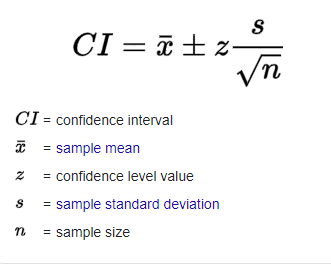

   Data
0    42
1    39
2    43
3    49
4    38
38.89


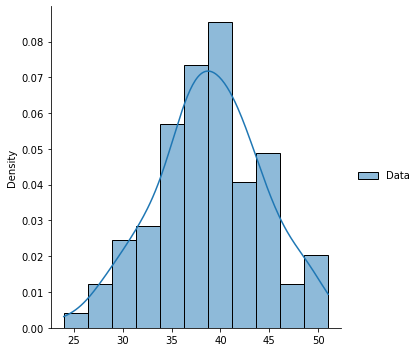

In [285]:
#Mencoba menghitung CI dengan data series data yang merupakan distribusi normal
print(data.head())
print(data.Data.mean())

#plot
sns.displot(data, kde = True, stat = 'density')
plt.show()

In [286]:
#Mengambil sampel dengan n sebesar 30, dan sampel sebesar 40
data_sampel = sampling(data = data.Data, nobs= 30, size = 60, orient=1)
print(data_sampel.head())

          0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  \
sample_1  39  36  32  49  31  42  46  38  33  41  ...  41  35  41  48  40  44   
sample_2  24  38  39  45  37  42  38  37  37  43  ...  42  31  46  41  45  38   
sample_3  31  41  45  41  28  36  35  42  49  31  ...  29  38  49  43  46  37   
sample_4  38  36  46  36  44  38  39  36  28  43  ...  43  36  37  41  44  37   
sample_5  38  37  37  36  42  29  43  48  31  37  ...  40  41  49  32  36  42   

          26  27  28  29  
sample_1  36  42  43  45  
sample_2  43  36  38  49  
sample_3  44  41  38  31  
sample_4  49  41  44  39  
sample_5  31  28  44  41  

[5 rows x 30 columns]


In [287]:
#Menentukan z-score dari interval kepercayaan 95%: 1.96
z_score = 1.96

#Kalkulasi dataset untuk mendapatkan nilai rata-rata sampel(Xbar), standard deviasi, standar error, CI 95% batas bawah dan atas
data_sampel['mean'] = data_sampel.apply(lambda x: x.mean(), axis = 1).round(4)
data_sampel['std'] = data_sampel.iloc[:, :-1].apply(lambda x: x.std(), axis =1).round(4)
data_sampel['standard_error'] = np.round((data.Data.std() / np.sqrt(30)), 4)
data_sampel['CI_batas_bawah'] = data_sampel['mean'] - z_score * data_sampel['standard_error'].round(4)
data_sampel['CI_batas_atas'] = data_sampel['mean'] + z_score * data_sampel['standard_error'].round(4)

#Mencari sampel yang mengalami kesalahan sampling
data_sampel[(data.Data.mean() < data_sampel['CI_batas_bawah']) | (data.Data.mean() > data_sampel['CI_batas_atas'])]


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,mean,std,standard_error,CI_batas_bawah,CI_batas_atas


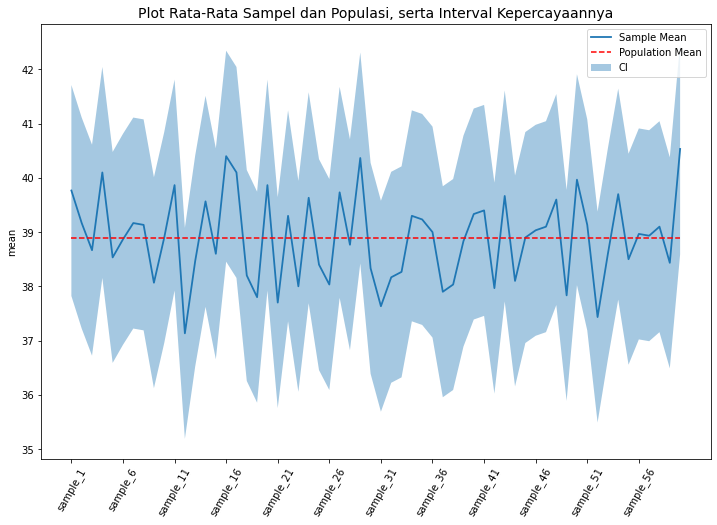

In [288]:
plt.figure(figsize = (12, 8))

sns.lineplot(y = data_sampel['mean'], x = data_sampel.index, linewidth = 1.8, label = 'Sample Mean')
sns.lineplot(y = data.Data.mean(), 
             x = data_sampel.index, 
             linestyle = '--', color = 'r', label = 'Population Mean')
plt.xticks(np.arange(0, 60, 5), rotation = 60)
plt.fill_between(x = data_sampel.index, y1 = data_sampel['CI_batas_bawah'], 
                 y2 = data_sampel['CI_batas_atas'], alpha = 0.4, label = 'CI')
plt.title('Plot Rata-Rata Sampel dan Populasi, serta Interval Kepercayaannya', size = 14, pad = 6)
plt.legend()
plt.savefig('test.png')
plt.show()


In [289]:
data_sampel['std'].mean()

5.301643333333332

#### Menghitung Interval Kepercayaan dengan Standar Deviasi Populasi(sigma) Tidak Diketahui
Untuk menghitung interval kepercayaan untuk rata-rata populasi di mana standar deviasi populasi(sigma) tidak diketahui, menggunakan standar deviasi sampel(s) untuk memperkirakan standar deviasi populasi. Dalam pengerjaannya, kita akan menggunakan distribusi t untuk mengganti distribusi z yang hanya bisa dipakai apabila standar deviasi populasi(sigma) diketahui. <br>
Formula Distribusi t(t-statistic):<br>
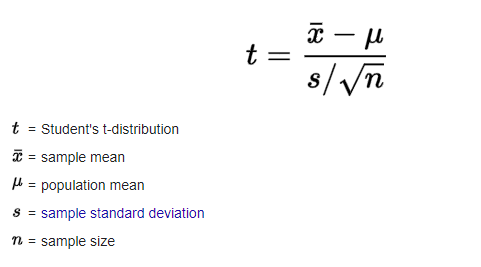


Untuk membuat interval kepercayaan pada rata-rata populasi menggunakan distribusi t, formulanya:<br>
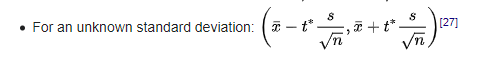

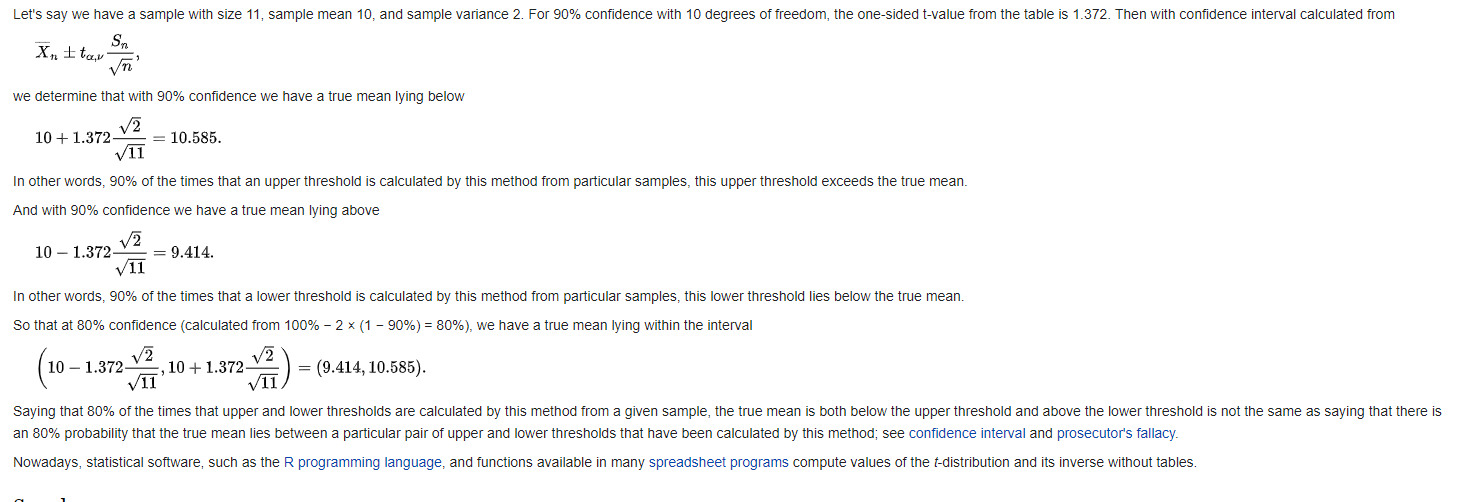

Untuk menentukannya, kita perlu perlu:
1. Mengasumsikan populasi yang diambil sampelnya normal/mendekati normal melalui teorema limit tengah.
2. Memperkirakan standar deviasi populasi(sigma) dengan standar deviasi sampel (s)
3. Menggunakan distribusi t, bukan distribusi z.

In [290]:
#Mencoba menghitung interval kepercayaan menggunakan package Scipy
#Analisis Deskriptif(Anggap saja nanti mean, std tidak diketahui)
df.describe()

,gaji
count,2000.000000
mean,2017.532500
std,395.392916
min,703.000000
25%,1750.000000
50%,2017.500000
75%,2272.500000
max,3541.000000


In [291]:
#Melakukan pengambilan sampel secara acak dengan n = 50, size interval = 80
gaji_sampel = sampling(df.gaji, nobs=100, size=100, orient=1)

#Menghitung degree of freedom yang digunakan
dof = len(gaji_sampel.columns) - 1

#Menghitung t-table dengan interval kepercayaan 95% uji dua sisi
from scipy import stats

t = stats.t.ppf(0.975, dof)

In [292]:
#Kalkulasi dataset untuk mendapatkan nilai rata-rata sampel(Xbar), standard deviasi, standar error, CI 95% batas bawah dan atas
gaji_sampel['mean'] = gaji_sampel.apply(lambda x: x.mean(), axis = 1).round(4)
gaji_sampel['std'] = gaji_sampel.iloc[:, :-1].apply(lambda x: np.std(x, ddof=1), axis =1).round(4)
gaji_sampel['standard_error'] = np.round((gaji_sampel['std'] / np.sqrt(100)), 4)
gaji_sampel['CI_batas_bawah'] = gaji_sampel['mean'] - t * gaji_sampel['standard_error'].round(4)
gaji_sampel['CI_batas_atas'] = gaji_sampel['mean'] + t * gaji_sampel['standard_error'].round(4)

#Mencari sampel yang mengalami kesalahan sampling
gaji_sampel[(gaji_sampel['mean'].mean() < gaji_sampel['CI_batas_bawah']) | (gaji_sampel['mean'].mean() > gaji_sampel['CI_batas_atas'])]

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,mean,std,standard_error,CI_batas_bawah,CI_batas_atas
sample_4,2060,2140,2057,2524,2738,2985,2107,2656,1831,1819,...,2131,2423,1209,1782,1876,2123.08,407.9649,40.7965,2042.130893,2204.029107
sample_56,2174,2552,1335,1810,2700,1249,1558,1958,2387,1611,...,1167,2146,1957,1657,1189,1902.16,415.4089,41.5409,1819.733842,1984.586158


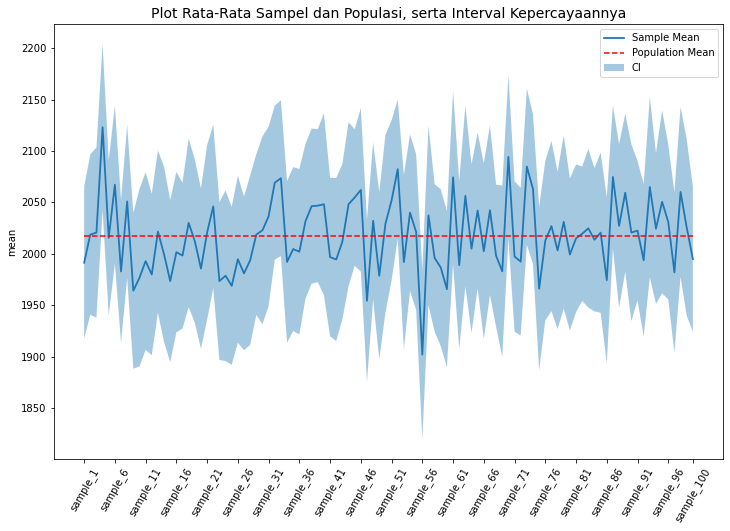

In [293]:
plt.figure(figsize = (12, 8))

sns.lineplot(y = gaji_sampel['mean'], x = gaji_sampel.index, linewidth = 1.8, label = 'Sample Mean')
sns.lineplot(y = gaji_sampel['mean'].mean(), 
             x = gaji_sampel.index, 
             linestyle = '--', color = 'r', label = 'Population Mean')
plt.xticks(np.concatenate([np.arange(0, len(gaji_sampel.index), 5), [len(gaji_sampel.index) - 1]]), rotation = 60)
plt.fill_between(x = gaji_sampel.index, y1 = gaji_sampel['CI_batas_bawah'], 
                 y2 = gaji_sampel['CI_batas_atas'], alpha = 0.4, label = 'CI')
plt.title('Plot Rata-Rata Sampel dan Populasi, serta Interval Kepercayaannya', size = 14, pad = 6)
plt.legend()
plt.show()

#### Interval Kepercayaan untuk Suatu Proporsi
Proporsi merupakan pecahan, rasio, atau persentase yang menunjukkan bagian dari sampel atau populasi yang memiliki suatu ciri yang diamati, berupa skala pengukuran nominal.
Formula: 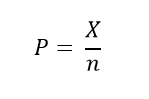

Untuk membuat tingkat kepercayaan terhadap proporsi, kita perlu memenuhi asumsi berikut.
1. Kondisi binomial telah terpenuhi, yakni:<br>
    a. Data sampel merupakan hasil penghitungan.<br>
    b. Hanya ada dua kemungkinan hasil: sukses atau gagal.
    c. Probabilitas tetap sama dari satu percobaan ke percobaan lainnya.<br>
    d. Percobaan-percobaannya saling bebas, tidak memengaruhi hasil percobaan lainnya.
2. Nilai n * pi dan n(1 - pi) di mana pi adalah probabilitas populasi, seharusnya lebih besar/sama dengan 5, untuk bisa menggunakan Cental Limit Theorem dan menerapkan standar distribusi normal, yakni z untuk mencapai suatu interval kemungkinan.

Proporsi sampel digunakan sebagai estimasi dari nilai proporsi populasi yang tidak diketahui. Untuk menghitung interval kepercayaan untuk suatu proporsi, menggunakan:<br>
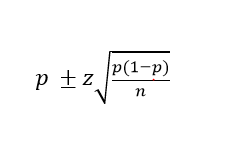

#### Pemilihan Ukuran Sampel yang Sesuai
Keputusan untuk memilih ukuran sampel yang tepat ini didasarkan oleh tiga variabel:
1. Batasan kesalahan yang peniliti bolehkan. Ada harga yang harus dibayar ketika menentukan batas kesalahan terhadap ukuran sampel. Batas kesalahan yang kecil, memerlukan ukuran sampel yang besar. Begitu pula sebaliknya.
2. Tingkat kepercayaan atau confidence level. Biasanya tingkat kepercayaan yang dipilih adalah 95% dan 99%. Semakin tinggi tingkat kepercayaan, maka ukuran sampel yang diperlukan akan semakin besar.
3. Variasi atau sebaran dari populasi yang diteliti. Terdapat tiga saran dalam menemukan nilai standar deviasi populasi.<br>
   a. Studi perencanaan. Metode yang paling umum ini dilakukan dengan cara menggunakan standar deviasi sampel yang diestimasi sebagai standar deviasi populasi.<br>
   b. Studi perbandingan. Cara ini menggunakan pendekatan literatur untuk dari pihak penyedia informasi yang dipercaya.<br>
   c. Pendekatan berbasis jangkauan berdasarkan Aturan Empiris bahwa hampir seluruh pengamatan berada +/- 3 standar deviasi, sehingga jarak dari ujung standar deviasinya sebesar 6. 

Formula untuk menentukan ukuran sampel dalam memperkirakan rata-rata populasi:
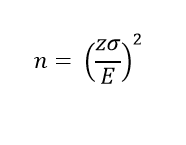
dimana:
n = ukuran sampel<br>
z = nilai normal baku yang sesuai dengan tingkat kepercayaan yang diinginkan.<br>
σ = standar deviasi populasi.<br>
E = nilai batas error maksimum yang diperbolehkan.<br>

Setiap desimal hasil dari penghitungan ukuran sampel selalu dibulatkan ke atas.

Selain ukuran sampel untuk memperkirakan rata-rata populasi, terdapat juga ukuran sampel untuk memperkirakan proporsi populasi. Tiga variabel yang dibutuhkan sama dengan di atas. Untuk formulanya adalah sebagai berikut:<br>
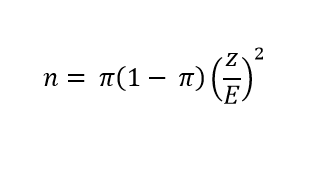

di mana:<br>
n = ukuran sampel.<br>
z = nilai normal baku yang sesuai dengan tingkat kepercayaan yang diinginkan.<br>
π = proporsi populasi.<br>
E = kesalahan maksimum yang diperbolehkan.

Apabila proporsi populasi tidak diketahui, maka π = 0.50

#### Faktor Koreksi Populasi Terbatas Populasi

Untuk populasi yang kita tahu jumlahnya/batas atas maka disebut populasi terbatas. Kita dapat melakukan perbaikan yang disebut faktor koreksi populasi terbatas/FPC(Finite-population correction factor). Pengambilan sampelnya tanpa pengembalian.<br>
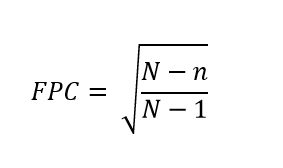

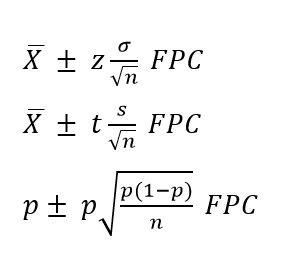

### Uji Hipotesis Satu Sampel : Uji Rata-Rata Populasi
Hipotesis: Pernyataan mengenai  parameter populasi untuk dibuktikan.<br>
Uji hipotesis: Suatu prosedur berdasarkan pada bukti sampel dan teori probabilitas untuk menentukan apakah suatu hipotesis merupakan pernyataan yang tepat.<br>
Untuk mengingat:<br>
1. Hipotesis Nol ditolak apabila t-statistik > nilai kritis, dan p-value < tingkat signifikansi, sehingga menerima Hipotesis Alternatif.
2. Hipotesis Nol gagal ditolak apabila t-statistik < nilai kritis, dan p-value > tingkat signifikansi, sehingga menolak Hipotesis Alternatif.

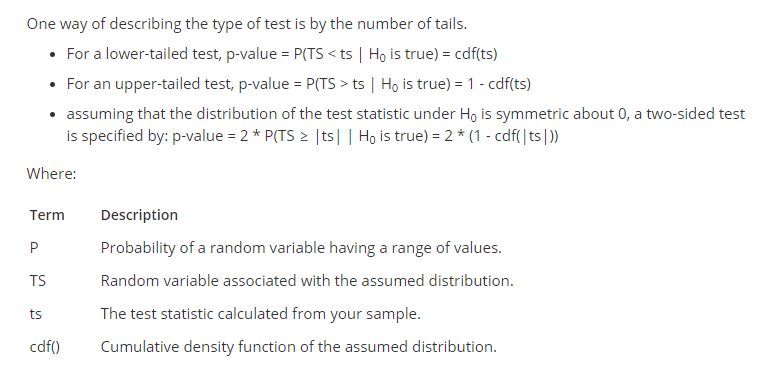

#### Prosedur Pengujian Hipotesis
1. Menetapkan Hipotesis Nol (H0) dan Hipotesis Alternatif (H1)<br>
H0 merupakan pernyataan yang diuji, sedangkan H1 merupakan pernyataan yang diterima apabila data sampel menyediakan bukti yang mencukupi bahwa hipotesis nol itu salah.
2. Memilih tingkat signifikansi<br>
Tingkat signifikansi merupakan probabilitas menolak ketika hipotesisnya benar. Tingkat signifikansi ini dilambangkan dengan alpha(α). Alpha juga disebut dengan probabilitas kesalahan jenis I, yaitu menolak hipotesis nol H0, ketika hipotesisnya benar. Sedangkan beta (β) untuk kesalahan jenis II, yakni menerima hipotesis nol ketika hipotesisnya salah.
3. Memilih statistik pengujian<br>
Pemilihan statistik pengujian berdasarkan karakteristik dan informasi sampel yang digunakan untuk memutuskan apakah menolak hipotesis nol atau tidak.
4. Merumuskan kaidah keputusan<br>
Merumuskan kondisi di mana hipotesis nol ditolak dan tidak ditolak dengan memisahkan daerah tersebut menggunakan nilai kritis. Nilai kritis merupakan titik yang membagi antara daerah di mana hipotesis nol ditolak dan daerah di mana hipotesis nol tidak ditolak.<br>
5. Mengambil keputusan.<br>
Keputusan tersebut diambil dengan menghitung statistik pengujian, membandingkan dengan nilai kritis dan mengambil keputusan untuk menolak hipotesis nol atau tidak menolak hipotesis nol.



#### Melakukan Pengujian Hipotesis
Preprocessing

In [294]:
#Dataframe: Real Estate
real_estate = pd.read_csv('real_estate.csv', index_col = False, delim_whitespace = True)
print(real_estate.mean())
real_estate.head()

Price          221.102857
n_bedrooms       3.800000
pool             0.638095
distance        14.628571
township         3.104762
garage           0.676190
n_bathrooms      2.080952
dtype: float64


,Price,n_bedrooms,size,pool,distance,township,garage,n_bathrooms
0,263.1,4,"2,300",0,17,5,1,2.0
1,182.4,4,"2,100",1,19,4,0,2.0
2,242.1,3,"2,300",1,12,3,0,2.0
3,213.6,2,"2,200",1,16,2,0,2.5
4,139.9,2,"2,100",1,28,1,0,1.5


Case 1<br>
Berita memuat rata-rata harga (price) lebih dari 220.0. Tingkat signifikansi sebesar 0.01. Berapa nilai p (p-value)?

a. Menentukan Hipotesis. <br>
Hipotesis dari case di atas, yakni: <br>

Hipotesis Nol (H0): Mean Populasi(mu) <= 220.0<br>
Hipotesis Alternatif (H1) : Mean Populasi > 220.0<br><br>

b. Tingkat signifikansi yang diperlukan: 0.01, dengan uji satu sisi.

In [295]:
#Menghitung z dari tingkat signifikansi
alpha = stats.norm.ppf(0.99) #untuk menghitung persentil dari alpha menjadi z-score
alpha

2.3263478740408408

c. Statistik pengujian yang dipilih adalah menggunakan nilai z dengan informasi standar deviasi yang sudah diketahui.

In [296]:
#Menentukan mu, sigma, dan n populasi.
mu = 220
sigma = np.std(real_estate.Price, ddof = 0)  #standar deviasi populasi* 
n = len(real_estate.Price)
xbar = real_estate.Price.mean()  #rata-rata sampel

print('Rata-rata Ppopulasi =', mu)
print('Standar Deviasi Populasi =', sigma)
print('Ukuran Populasi =', n)

#Menghitung z
z = (xbar - mu) / (sigma / np.sqrt(n))  #menghitung nilai z
p_value = 1-stats.norm.cdf(z)  #upper-tail test dihitung menggunakan 1 - (lower-tail test)
print('Nilai z =', z)
print('Nilai p_value =', p_value) 

#Menghitung confidence interval APABILA nilai rata-rata populasi TIDAK DIKETAHUI
upper_CI = alpha * (sigma / np.sqrt(n)) 
print('Nilai batas atas CI =', xbar + upper_CI)


Rata-rata Ppopulasi = 220
Standar Deviasi Populasi = 46.8805563455182
Ukuran Populasi = 105
Nilai z = 0.24105778014777235
Nilai p_value = 0.4047551672582741
Nilai batas atas CI = 231.7460704342244


Nilai z-score yang diteliti adalah 0.24 berada kurang dari 2.32. Nilai p-value sebesar 0.405 > 0.01, maka kita gagal menolak hipotesis nol di mana rata-rata populasi kurang dari atau sama dengan 220. Pengerjaan di atas jika menggunakan z apabila standar deviasi populasi diketahui. Sebaliknya, kita juga bisa menggunakan standar deviasi sampel sebagai estimator sigma, dan mengganti z dengan student t. Berikut pengerjaannya.

In [297]:
#Melakakukan penghitungan menggunakan student test
var_samp = np.sum((real_estate.Price - xbar) ** 2) / (len(real_estate.Price) - 1)  #menghitung variansi sampel
s = np.sqrt(var_samp)  #menghitung standar deviasi sampel
t = (xbar - mu) / (s / np.sqrt(n))  #menghitung t-statistik
batas = stats.t.ppf(0.99, df = n-1)  #menghitung nilai kritis
p_value = 1 - stats.t.cdf(t, n - 1)  #menghitung p_value
#alternatif penghitungan p_value upper-tailed t-test
p_value_alt = stats.t.sf(np.abs(t), n-1)


print('Nilai t-statistic =', t)
print('Nilai batas statistik =', batas)
print('Nilai p_value =', p_value)
print('Nilai p-value menggunakan survival function =', p_value_alt)

#MEnghitung batas atas t
upper_CI_t = batas * (s / np.sqrt(n))  #menghitung tingkat kepercayaan atas
print('Nilai batas atas CI =', xbar + upper_CI_t)

Nilai t-statistic = 0.2399071397825231
Nilai batas statistik = 2.362739200696862
Nilai p_value = 0.40543723269877807
Nilai p-value menggunakan survival function = 0.40543723269877807
Nilai batas atas CI = 231.96440885223535


Nilai t-statistic < nilai kritis -->  0.2399 < 2.3627 <br>
Nilai p-value > tingkat signifikansi -- > 0.405 > 0.01

Maka gagal menolak Hipotesis Nol.

In [298]:
#Menghitung t-statistic dan p-value menggunakan ttest_1samp
alt = stats.ttest_1samp(a = real_estate.Price,
                        popmean = 220,
                        alternative='greater')
alt

Ttest_1sampResult(statistic=0.23990713978254163, pvalue=0.4054372326987709)

Soal selanjutnya<br>
Rata-rata ukuran lebih dari 2100, dengan signifikansi 0.01. Hipotesisnya :<br>
Hipotesis Nol (H0) : mu <= 2100<br>
Hipotesis Alternatif (H1) : mu > 2100

In [299]:
#Preprocessing
real_estate['size'] = real_estate['size'].str.replace(',', '').astype('int')

In [309]:
#Penghitungan student-test
mu = 2100
n = len(real_estate['size'])
xbar = real_estate['size'].mean()

var = np.sum((real_estate['size'] - xbar) ** 2) / (n - 1)
std_samp = np.sqrt(var)
t = (xbar - mu) / (std_samp / np.sqrt(n))
p_value = 1 - stats.t.cdf(t, n - 1)
critical_value = stats.t.ppf(0.99, df = n - 1)

print('Nilai t-statistik =', t)
print('Nilai kritis =', critical_value)
print('Nilai p_value =', p_value)

Nilai t-statistik = 5.102039365509032
Nilai kritis = 2.362739200696862
Nilai p_value = 7.601152620662077e-07


t-statistik > Nilai kritis --> 5.1 > 2.36<br>
p_value < tingkat signifikansi --> 0.00 < 0.01

Kesimpulan: Menolak Hipotesis Nol dan Hipotesis Alternatif diterima

In [301]:
alt_1 = stats.ttest_1samp(a = real_estate['size'], 
                          popmean = mu, 
                          alternative = 'greater')
alt_1

Ttest_1sampResult(statistic=5.102039365509032, pvalue=7.60115262031644e-07)

#### Uji Hipotesis Menggunakan Proporsi
Uji ini dilakukan apabila suatu case memenuhi kondisi binomial.

Case: phi(proporsi) = 80%, n = 2000, p = 1550. Tingkat kepercayaan = 95%. Peluang akan terjadi?<br>
Hipotesis Nol : Proporsi >= 80 sehingga menunjukkan kemungkinan terjadi lagi.<br>
Hipotesis Alternatif : Proporsi < 80 sehingga tidak menunjukkan kemungkinan terjadi lagi

Pengerjaan:



In [317]:
#Mengolah informasi yang ada
phi = 0.8   #proporsi populasi
p = 1550 / 2000   #proporsi sampel
n = 2000    #jumlah pengamatan
alpha = 0.05

#menghitung z
z = (p - phi) / np.sqrt(phi * (1 - phi) / n)  #formula menghitung z menggunakan proporsi populasi dan sampel
nilai_kritis = stats.norm.ppf(0.05)
p_value = stats.norm.cdf(z)

print('Nilai z proporsi statistik =', z)
print('Nilai kritis =', nilai_kritis)
print('P-value =', p_value)


Nilai z proporsi statistik = -2.79508497187474
Nilai kritis = -1.6448536269514729
P-value = 0.002594303776157761


Nilai z hitung < Nilai Kritis<br> -2.8 < -1.645

Nilai P < Tingkat Signifikansi<br>
0.0026 < 0.05

Kesimpulan: Perbedaan 2.5% antara proporsi sampel dan populasi cukup signifikan secara statistik sehingga menolak Hipotesis Nol dan menerima Hipotesis Alternatif, yang berarti tidak menunjukkan kemungkinan untuk terjadi lagi.